# Bonus Analysis

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:
    -Import the SQL database into Pandas.

In [2]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

#Import the database information
from config import hostname, portno, database, username, password

In [3]:
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{portno}/{database}')
conn = engine.connect()

In [5]:
salary_info = pd.read_sql("SELECT * FROM salary_info", conn)
salary_info

,emp_no,title_name,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Engineer,40054
4,10004,Senior Engineer,40054
...,...,...,...
443303,499997,Engineer,49597
443304,499997,Senior Engineer,49597
443305,499998,Senior Staff,40000
443306,499998,Staff,40000


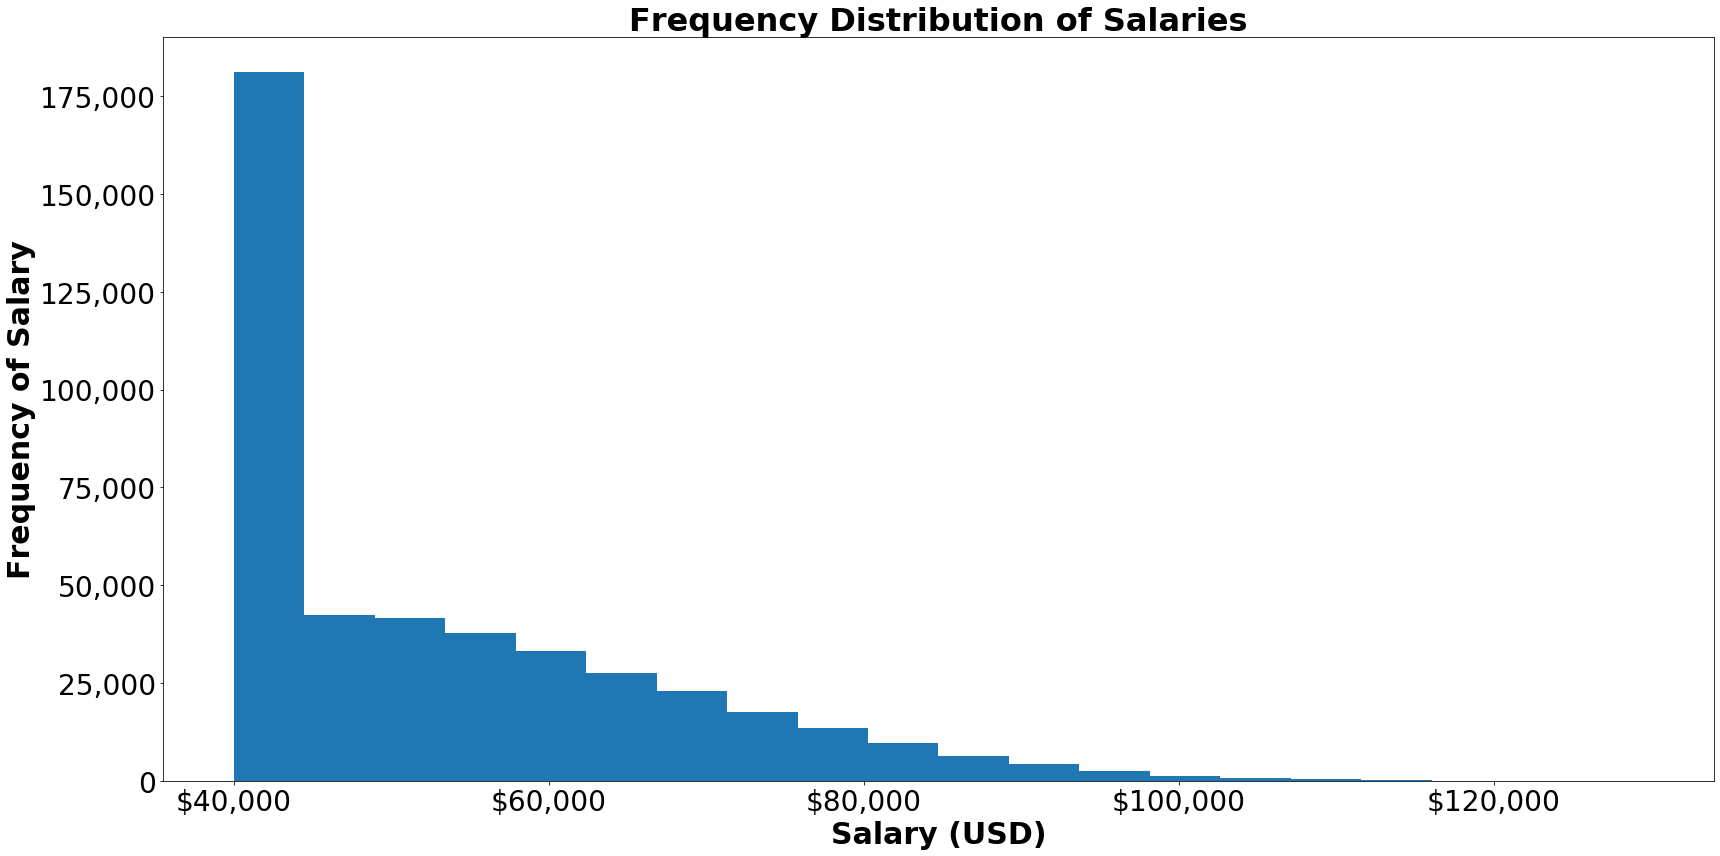

In [6]:
# Create a histogram to visualize the most common salary ranges for employees.

# Setting figure size
fig, ax = plt.subplots(figsize=(24,12))

# Editing format of x-axis and y-axis
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Generating graph
plt.hist(salary_info["salary"], bins=20, align="mid")

# Editing tick marks
plt.tick_params(axis='both', labelsize=28)

# Setting y axis
plt.ylim(0, 190000)

# Adding title, labels to graph
plt.title("Frequency Distribution of Salaries", fontsize=32, fontweight="bold")
plt.xlabel("Salary (USD)", fontsize=30, fontweight="bold")
plt.ylabel("Frequency of Salary", fontsize=30, fontweight="bold")

# Fitting to frame and displaying
plt.tight_layout()
plt.show()

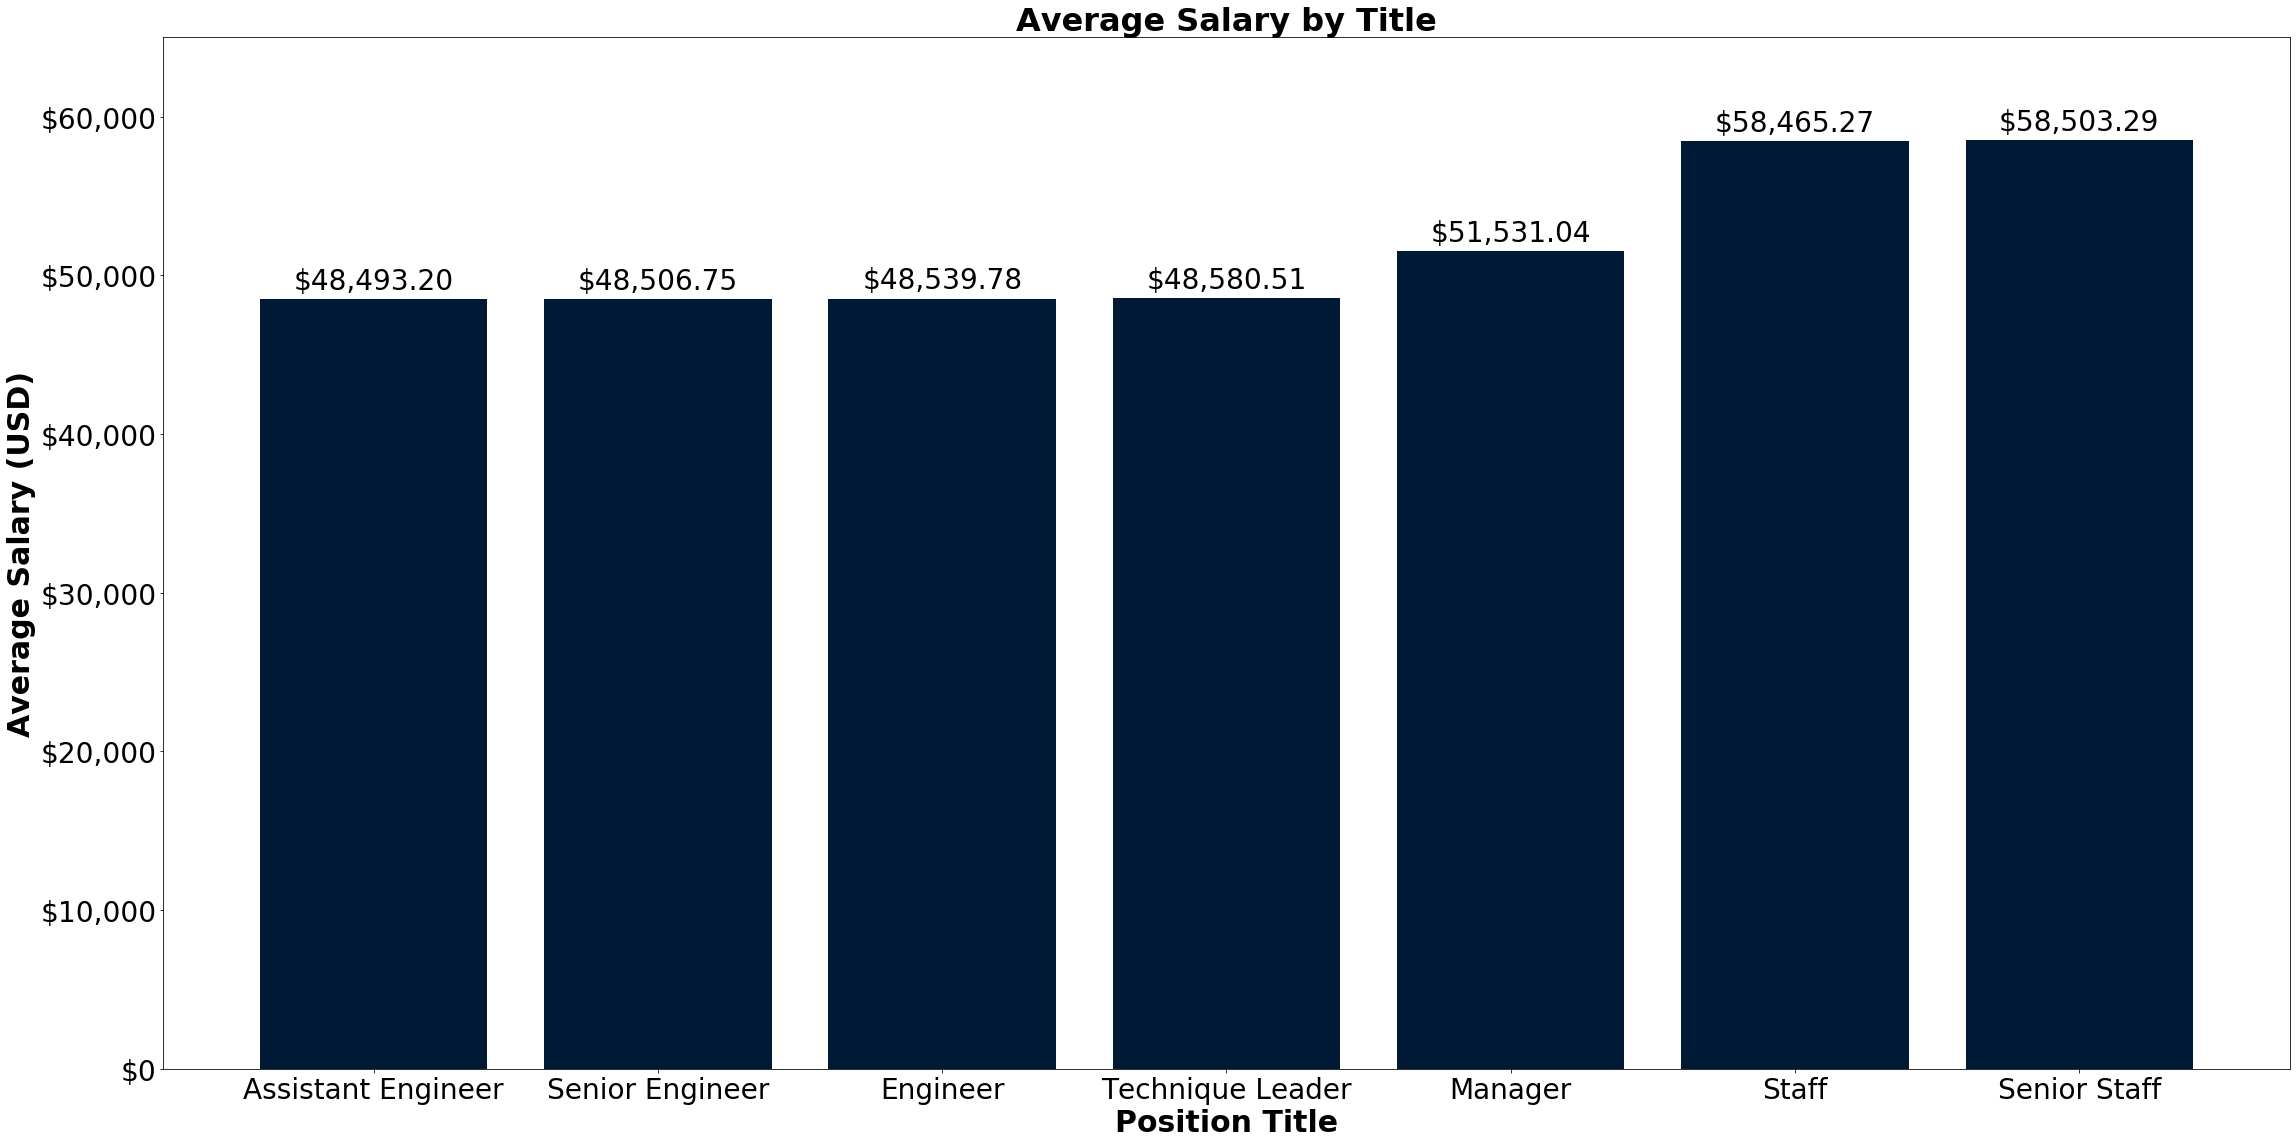

In [7]:
# Create a bar chart of average salary by title.

#Generate grouped data frame to create graph from
position_salary = salary_info.groupby("title_name", as_index=False).agg({"salary": "mean"})
position_salary = position_salary.sort_values("salary", ascending=True)

# Setting values for graph
xlabels = position_salary["title_name"]
xvalues = np.arange(0, len(xlabels), 1)
yvalues = position_salary["salary"]

# Setting figure size
fig, ax = plt.subplots(figsize=(32,16))

# Editing format of y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Setting bar color (color) and aligning bars
plt.bar(xvalues, yvalues, color='#001A35', align="center")

# Editing tick marks
plt.tick_params(axis='both', labelsize=28)

# Adding labels to x-axis
plt.xticks(ticks=xvalues, labels=xlabels)
# Setting y axis
plt.ylim(0, 65000)

# Adding labels for bars
for x,y in zip(xvalues, yvalues):
    label = "${:,.2f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0, 10),
                ha='center',
                fontsize=28)

# Adding title, labels to graph
plt.title("Average Salary by Title", fontsize=32, fontweight="bold")
plt.xlabel("Position Title", fontsize=30, fontweight="bold")
plt.ylabel("Average Salary (USD)", fontsize=30, fontweight="bold")

# Fitting to frame and displaying
plt.tight_layout()
plt.show()